# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 
from scipy.stats import linregress
from config import api_key
import os
import gmaps

# Import API key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [55]:
#Stu_SpaceX.ipynb

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

cloudiness = []
country = []
date = []
cities_list = []
lat =[]
lng =[]
humidity = []
max_temp = []
wind_speed = []

#Stu_MovieLoop.ipynb
# Ins_OpenWeatherRequest.ipynb
#api_exceptions.ipynb
#https://stackoverflow.com/questions/40442014/python-pandas-valueerror-arrays-must-be-all-same-length

print('Beginning Data Retrieval')
print('---------------------')
counter = 1
for city in cities:
    city_url = url + '&q=' + city.replace(' ','+')
    print(f'Processing City # {counter} | {city}')
    print(city_url)
    
    try:
        city_data = get_current(city,**setting)
        cl,cityt,dt,hm,mt,ws,lat,lng = city_data(*desired_keys)
        cloudiness.append(cl)
        country.append(ct)
        date.append(dt)
        humidity.append(hm)
        max_temp.append(mt)
        wind_speed.append(ws)
        cities_list.append(city)
        lat.append(lat)
        lng.append(lng)
    
    except Exception:
        print("City not found. Skipping...")
        counter +=1
print('---------------------')
print('Data Retrieval Complete') 


Beginning Data Retrieval
---------------------
Processing City # 1 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc98ae7f339c301906123220eae1daed&q=sola
City not found. Skipping...
Processing City # 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc98ae7f339c301906123220eae1daed&q=ushuaia
City not found. Skipping...
Processing City # 3 | mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc98ae7f339c301906123220eae1daed&q=mehamn
City not found. Skipping...
Processing City # 4 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc98ae7f339c301906123220eae1daed&q=bredasdorp
City not found. Skipping...
Processing City # 5 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc98ae7f339c301906123220eae1daed&q=saldanha
City not found. Skipping...
Processing City # 6 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fc98ae7f33

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_df = pd.DataFrame({
     'City':city,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Latitude':lat,
     'Longitude':lng,
     'Max Temperature':max_temp,
     'Wind Speed':wind_speed,
     })


In [40]:
weather_data = pd.DataFrame(weather_df)
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

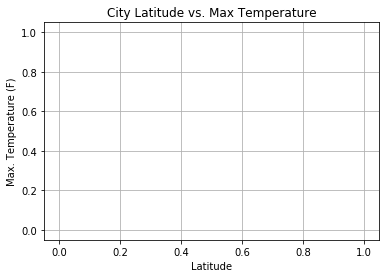

In [29]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

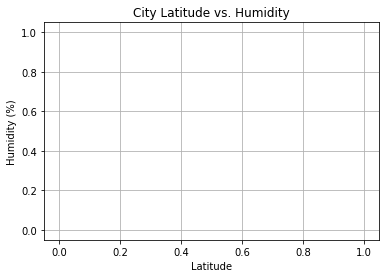

In [7]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Cloudiness Plot

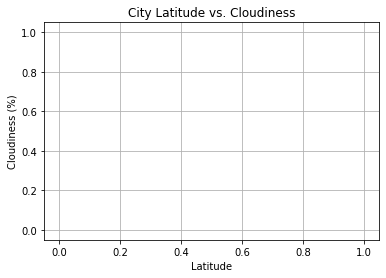

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

#### Latitude vs. Wind Speed Plot

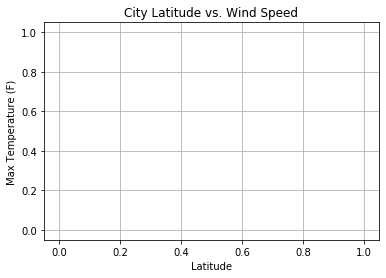

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Linear Regression

In [52]:
# OPTIONAL: Create a function to create Linear Regression plots


In [53]:
# Create Northern and Southern Hemisphere DataFrames
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
#

northern = city.loc[city["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = cities.loc[cities["Latitude"] < 0.0]
southern.reset_index(inplace=True)

def plotLinearRegression(xdata,ydata,xlbl,ylbl,iblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(zdata, ydata)
    
    print(f"The r-squared is: {rvalue}")
    regress_values = zdata *slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()
    

AttributeError: 'str' object has no attribute 'loc'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(xdata,ydata,xlbl,ylbl,iblpos) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
xlabl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(notern[xlbl],nothern[ylbl])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,15)
plotLinearRegression(southern[xlbl],southern[ylbl])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,33)
plotLinearRegression(southern[xlbl],southern[ylbl])

In [ ]:
Couldn't make observations as data visualization was 